In [1]:
import os, shutil

In [2]:
# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = '../../data/dogs-vs-cats/train'

# The directory where we will
# store our smaller dataset
base_dir = '../../data/dogs-vs-cats/cats_and_dogs_small'
if not os.path.exists(base_dir):
    os.mkdir(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
    
validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)
    
test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.exists(train_cats_dir):
    os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.exists(train_dogs_dir):
    os.mkdir(train_dogs_dir)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
if not os.path.exists(validation_cats_dir):
    os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.exists(validation_dogs_dir):
    os.mkdir(validation_dogs_dir)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.exists(test_cats_dir):
    os.mkdir(test_cats_dir)

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.exists(test_dogs_dir):
    os.mkdir(test_dogs_dir)

# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [3]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [4]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(
            layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3))
         )
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.
W0826 19:49:41.201961 139644753676096 deprecation_wrapper.py:119] From /home/adrianoff/dev/projects/learning/cats_vs_dogs/venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0826 19:49:41.214615 139644753676096 deprecation_wrapper.py:119] From /home/adrianoff/dev/projects/learning/cats_vs_dogs/venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0826 19:49:41.216950 139644753676096 deprecation_wrapper.py:119] From /home/adrianoff/dev/projects/learning/cats_vs_dogs/venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0826 19:49:41.231703 139644753676096 deprecation_wrapper.py:119] From /home/adrianoff/dev/projects/learning/cats_vs_dogs/v

In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

In [ ]:
model.summary()

In [14]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [6]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [18]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [19]:
labels_batch

array([1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 0.], dtype=float32)

In [20]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

W0825 14:45:18.436073 140039320287040 deprecation_wrapper.py:119] From /home/adrianoff/dev/projects/learning/cats_vs_dogs/venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/30
100/100 [==============================] - 52s 516ms/step - loss: 0.6873 - acc: 0.5395 - val_loss: 0.6714 - val_acc: 0.6030
Epoch 2/30
100/100 [==============================] - 60s 598ms/step - loss: 0.6518 - acc: 0.6045 - val_loss: 0.7279 - val_acc: 0.5580
Epoch 3/30
100/100 [==============================] - 56s 560ms/step - loss: 0.6036 - acc: 0.6620 - val_loss: 0.5951 - val_acc: 0.6730
Epoch 4/30
100/100 [==============================] - 59s 593ms/step - loss: 0.5573 - acc: 0.7105 - val_loss: 0.7125 - val_acc: 0.6230
Epoch 5/30
100/100 [==============================] - 59s 594ms/step - loss: 0.5366 - acc: 0.7280 - val_loss: 0.5769 - val_acc: 0.6940
Epoch 6/30
100/100 [==============================] - 54s 542ms/step - loss: 0.5111 - acc: 0.7380 - val_loss: 0.6199 - val_acc: 0.6700
Epoch 7/30
100/100 [==============================] - 61s 611ms/step - loss: 0.4804 - acc: 0.7560 - val_loss: 0.5553 - val_acc: 0.7020
Epoch 8/30
100/100 [==============================] - 6

In [21]:
model.save('cats_and_dogs_small_1.h5')

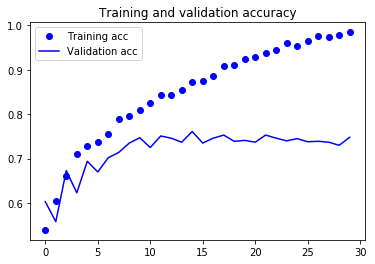

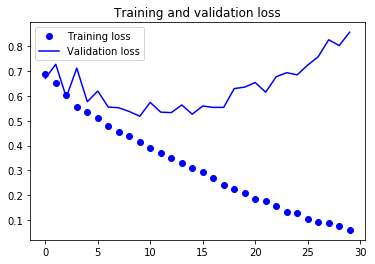

In [23]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

<h1>Using data augmentation</h2>

In [7]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

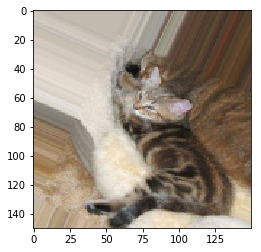

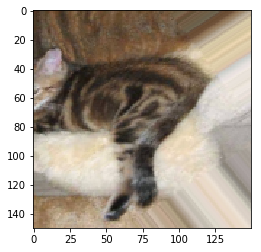

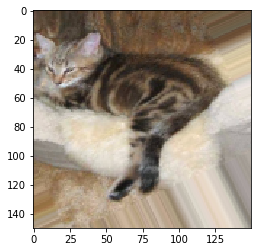

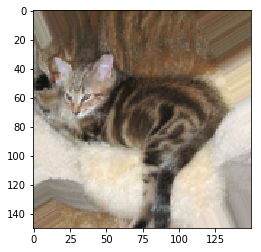

In [11]:
# This is module with image preprocessing utilities
from keras.preprocessing import image
import matplotlib.pyplot as plt

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# We pick one image to "augment"
img_path = fnames[7]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [14]:
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [15]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [16]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/100
100/100 [==============================] - 96s 958ms/step - loss: 0.6931 - acc: 0.5319 - val_loss: 0.6859 - val_acc: 0.5590
Epoch 2/100
100/100 [==============================] - 97s 973ms/step - loss: 0.6840 - acc: 0.5400 - val_loss: 0.6645 - val_acc: 0.5870
Epoch 3/100
100/100 [==============================] - 94s 938ms/step - loss: 0.6722 - acc: 0.5766 - val_loss: 0.6611 - val_acc: 0.5901
Epoch 4/100
100/100 [==============================] - 96s 955ms/step - loss: 0.6632 - acc: 0.5972 - val_loss: 0.6372 - val_acc: 0.6366
Epoch 5/100
100/100 [==============================] - 91s 911ms/step - loss: 0.6563 - acc: 0.6103 - val_loss: 0.6156 - val_acc: 0.6732
Epoch 6/100
100/100 [==============================] - 74s 737ms/step - loss: 0.6322 - acc: 0.6387 - val_loss: 0.5906 - val_acc: 0.6804
Epoch 7/100
100/100 [==============================] - 81s 807ms/step - loss: 0.6245 - acc: 0.6522 - val_loss: 0.5883 - val_acc: 0.6827
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 73s 734ms/step - loss: 0.4180 - acc: 0.8078 - val_loss: 0.4169 - val_acc: 0.8157
Epoch 62/100
100/100 [==============================] - 93s 932ms/step - loss: 0.4325 - acc: 0.8015 - val_loss: 0.4326 - val_acc: 0.8147
Epoch 63/100
100/100 [==============================] - 93s 933ms/step - loss: 0.4213 - acc: 0.8038 - val_loss: 0.4705 - val_acc: 0.7887
Epoch 64/100
100/100 [==============================] - 78s 784ms/step - loss: 0.4060 - acc: 0.8144 - val_loss: 0.4186 - val_acc: 0.8164
Epoch 65/100
100/100 [==============================] - 78s 775ms/step - loss: 0.4140 - acc: 0.8012 - val_loss: 0.4461 - val_acc: 0.8020
Epoch 66/100
100/100 [==============================] - 76s 755ms/step - loss: 0.4241 - acc: 0.8038 - val_loss: 0.5277 - val_acc: 0.7474
Epoch 67/100
100/100 [==============================] - 76s 762ms/step - loss: 0.4086 - acc: 0.8178 - val_loss: 0.4430 - val_acc: 0.7931
Epoch 68/100
100/100 [===================

In [17]:
model.save('cats_and_dogs_small_2.h5')

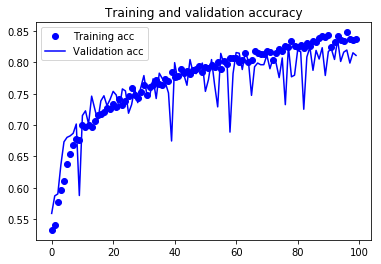

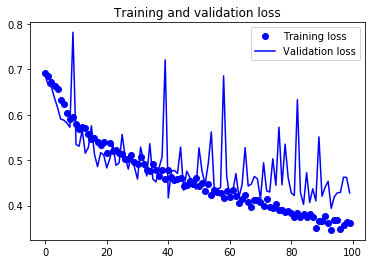

In [18]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()